<a href="https://colab.research.google.com/github/seyonechithrananda/ScaleRez/blob/master/Seyone_GAN_Percept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import keras
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Activation, Dense, Input, Dropout
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, cv2
import tensorflow as tf
from keras import losses
from keras.optimizers import SGD,RMSprop,adam
from keras.layers import Reshape, Conv2DTranspose, BatchNormalization, ZeroPadding2D
from keras.models import load_model
from IPython.display import clear_output
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!nvidia-smi

Sun Feb  2 00:44:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    14W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
from zipfile import ZipFile
file_name = "/content/Meta.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


['35.png', '4.png', '18.png', '38.png', '39.png', '30.png', '23.png', '24.png', '34.png', '13.png', '12.png', '22.png', '33.png', '9.png', '15.png', '11.png', '37.png', '42.png', '25.png', '31.png', '16.png', '14.png', '.~lock.ClassesInformationStrong.ods#', '20.png', '28.png', '8.png', '3.png', '5.png', '2.png', '26.png', '36.png', '27.png', '17.png', '41.png', '.~lock.ClassesInformation.ods#', '1.png', '0.png', '40.png', '6.png', '32.png', '19.png', '21.png', '10.png', '7.png', '29.png']
Working....
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


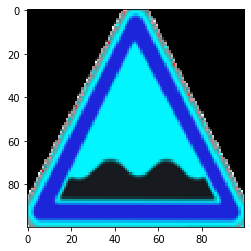

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
.~lock.ClassesInformationStrong.ods#
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
.~lock.ClassesInformation.ods#
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
Done loading Training
Done Transforming
41
(100, 100, 3)
Completed!
(0, 100, 100, 3)
(41, 100, 100, 3)
35.png
(400, 400, 3)


ValueError: ignored

In [67]:
PATH = os.getcwd()
# Define data path
data_path = "/content/drive/My Drive/Meta"
data_dir_list = os.listdir(data_path)
print (data_dir_list)
img_rows=100
img_cols=100
num_channel =3

img_data_list=[]
img_target_list=[]
pos = []
count=0
print("Working....")
for img in data_dir_list:
    if (img.find("png")!=-1):
      path =  os.path.join(data_path, img)
      input_img = cv2.imread(path)
      input_img=cv2.resize(input_img,(img_rows,img_cols))
      print(input_img.shape)
      img_data_list.append(input_img)
    else:
      pos.append(count)
      print (img)
      data_dir_list.remove(img)
    count+=1
    if(count%1000==0):
        print(count)
    if(count == 12):
        imgplt=plt.imshow(input_img)
        plt.show()
print("Done loading Training")
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print("Done Transforming")
print (img_data.shape[0])
print (img_data[0].shape)
print("Completed!")
x_train = img_data[0:100,:,:,:]
x_test = img_data[101:104,:,:,:]
count=0
print (x_test.shape)
print(x_train.shape)
count=0

for img in data_dir_list:
    print (img)
    path =  os.path.join(data_path, img)
    input_img = cv2.imread(path)
    target_img=cv2.resize(input_img,(400,400))
    print (target_img.shape)
    img_target_list.append(target_img)
    if pos.index(count):
       img_target_list.remove(img)
    count+=1
    if(count%1000==0):
        print(count)
    if(count == 12):
        imgplt=plt.imshow(target_img)
        plt.show()
print("Done loading target")
target_data = np.array(img_target_list)
target_data = target_data.astype('float32')
target_data /= 255
print("Done Transforming")
print (target_data[0].shape)
print("Completed!")
target_data_train = target_data[0:100,:,:,:]
print (len(target_data_train))
target_data_test = target_data[101:104,:,:,:]

In [0]:
# Network parameters
input_shape = (100, 100, 3)
batch_size = 1
kernel_size = 3
latent_dim = 64
# Encoder/Decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

In [49]:
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               padding='same', kernel_initializer='glorot_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
shape = K.int_shape(x)
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)
encoder = Model(inputs, latent, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
batch_normalization_40 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
batch_normalization_41 (Batc (None, 25, 25, 64)        256       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 25, 25, 64)        0   

In [51]:
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = Conv2DTranspose(filters=64,kernel_size=kernel_size, strides=2, padding='same' ,kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2DTranspose(filters=32,kernel_size=kernel_size, strides=2, padding='same' ,kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2DTranspose(filters=3,kernel_size=kernel_size, strides=2, padding='same' ,kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2DTranspose(filters=3,kernel_size=kernel_size, strides=2, padding='same' ,kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
# for filters in layer_filters[::-1]:
#     x = Conv2DTranspose(filters=filters,kernel_size=kernel_size, strides=2, padding='same' ,kernel_initializer='glorot_normal')(x)
#     x = BatchNormalization()(x)
#     x = LeakyReLU(alpha=0.2)(x)
#x = Conv2DTranspose(filters=3, kernel_size=kernel_size, strides=2, padding='same', kernel_initializer='glorot_normal')(x)
#x = BatchNormalization()(x)
#x = LeakyReLU(alpha=0.2)(x)
#x = Conv2DTranspose(filters=3, kernel_size=kernel_size, strides=2, padding='same', kernel_initializer='glorot_normal')(x)
#x = BatchNormalization()(x)
#x = LeakyReLU(alpha=0.2)(x)
#x = Conv2DTranspose(filters=3, kernel_size=kernel_size, padding='same', kernel_initializer='glorot_normal')(x)
#x = BatchNormalization()(x)
outputs = Activation('sigmoid', name='decoder_output')(x)

# Instantiate Decoder Model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 40000)             2600000   
_________________________________________________________________
reshape_9 (Reshape)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_transpose_24 (Conv2DT (None, 50, 50, 64)        36928     
_________________________________________________________________
batch_normalization_45 (Batc (None, 50, 50, 64)        256       
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_transpose_25 (Conv2DT (None, 100, 100, 32)      1846

In [52]:
disc_inputs = Input(shape=(400,400,3), name='disc_input')
x = disc_inputs
x = Conv2D(filters=3, kernel_size=kernel_size,strides=1, padding='same', kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2D(filters=32, kernel_size=kernel_size,strides=2, padding='same', kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2D(filters=64, kernel_size=kernel_size,strides=2, padding='same', kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Conv2D(filters=128, kernel_size=kernel_size,strides=2, padding='same', kernel_initializer='glorot_normal')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = Flatten()(x)
x = Dense(16)(x)
out = Dense(2, name='out')(x)
disc = Model(disc_inputs, out, name='discrim')
disc.summary()

Model: "discrim"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
disc_input (InputLayer)      (None, 400, 400, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 400, 400, 3)       84        
_________________________________________________________________
batch_normalization_49 (Batc (None, 400, 400, 3)       12        
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 400, 400, 3)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization_50 (Batc (None, 200, 200, 32)      128       
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 200, 200, 32)      0   

In [0]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []
    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        plt.savefig('SRCNN', dpi = None)
        
plot_losses = PlotLosses()

In [54]:
from keras.optimizers import SGD,RMSprop,Adam
sgd = SGD(lr=1e-2, clipnorm=1, clipvalue=0.5)


disc.compile(loss='binary_crossentropy', optimizer=sgd,  metrics=['acc'])
gen = Model(inputs, decoder(encoder(inputs)), name='Generator')
z = Input(shape=((100,100,3,)))
img = gen(z)
disc.summary()
disc.trainable = False
valid = disc(img)
gan = Model(z, valid, name='GAN')

gan.compile(loss='binary_crossentropy',  optimizer=sgd,  metrics=['acc'])

gan.summary()


Model: "discrim"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
disc_input (InputLayer)      (None, 400, 400, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 400, 400, 3)       84        
_________________________________________________________________
batch_normalization_49 (Batc (None, 400, 400, 3)       12        
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 400, 400, 3)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization_50 (Batc (None, 200, 200, 32)      128       
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 200, 200, 32)      0   

In [55]:
gen.compile(loss='mean_squared_logarithmic_error', optimizer=sgd,  metrics=['acc'])
gen.fit(x_train,target_data_train, validation_data=(x_test, target_data_test), callbacks=[plot_losses], verbose=0, epochs=1000, batch_size=1)

ValueError: ignored

In [0]:
train = []
epoch=10
num_sample=100
num_classes = 2

for epoch in range (epoch):
  #gen.fit(x_train,target_data_train, validation_data=(x_test, target_data_test), callbacks=[plot_losses], verbose=0, epochs=100, batch_size=1)
  real_labels = np.ones((100,2))
  fake_labels = np.zeros((100,2))
    #----------------
    #Train on just the discrim
    #----------------
    #train on real
  print("Train on real")
  d_loss_real = disc.train_on_batch(target_data_train,real_labels)
    #train on fake
  fake = gen.predict(x_train)
  d_loss_fake = disc.train_on_batch(fake, fake_labels)
    #average of the loss
  print("Train on fake")
  d_loss = 0.5 *np.add(d_loss_real, d_loss_fake)
    #----------------
    #Train on entire model
    #----------------
  print('GAN TRAIN')
  g_loss = gan.train_on_batch(x_train, fake_labels) 
  print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss[0]))
    # If at save interval => save generated image samples


Train on real


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on fake
GAN TRAIN
0 [D loss: 4.822851, acc.: 9.00%] [G loss: 0.000000]
Train on real
Train on fake
GAN TRAIN
1 [D loss: 2.908815, acc.: 9.25%] [G loss: 0.000000]
Train on real
Train on fake
GAN TRAIN
2 [D loss: 1.593310, acc.: 6.50%] [G loss: 0.000000]
Train on real
Train on fake
GAN TRAIN
3 [D loss: 1.311482, acc.: 7.25%] [G loss: 0.000000]
Train on real
Train on fake
GAN TRAIN
4 [D loss: 0.974193, acc.: 11.50%] [G loss: 0.000000]
Train on real
Train on fake
GAN TRAIN
5 [D loss: 0.862461, acc.: 8.75%] [G loss: 0.000000]
Train on real
Train on fake
GAN TRAIN
6 [D loss: 0.405261, acc.: 5.50%] [G loss: 0.000000]
Train on real
Train on fake
GAN TRAIN
7 [D loss: 1.082039, acc.: 21.00%] [G loss: 0.000000]
Train on real
Train on fake
GAN TRAIN
8 [D loss: 0.756293, acc.: 10.00%] [G loss: 0.000000]
Train on real
Train on fake
GAN TRAIN
9 [D loss: 0.453898, acc.: 4.75%] [G loss: 0.000000]


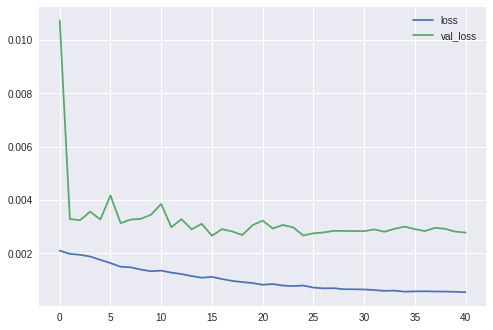

KeyboardInterrupt: ignored

<Figure size 576x396 with 0 Axes>

In [0]:
sgd = SGD(lr=100, clipnorm=1, clipvalue=0.5)
gen.compile(loss='mean_squared_logarithmic_error', optimizer=sgd,  metrics=['acc'])
gen.fit(x_train,target_data_train, validation_data=(x_test, target_data_test), callbacks=[plot_losses], verbose=0, epochs=100, batch_size=1)

In [0]:
fname = 'SRGAN.h5'
gen.save(fname,overwrite=True)
from keras.models import load_model

In [0]:
fname = 'SRGAN.h5'
gen=load_model(fname)

In [0]:
model_json = gen.to_json()
with open("gen.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
gen.save_weights("gen.h5")
print("Saved model to disk")

Saved model to disk


(100, 400, 400, 3)


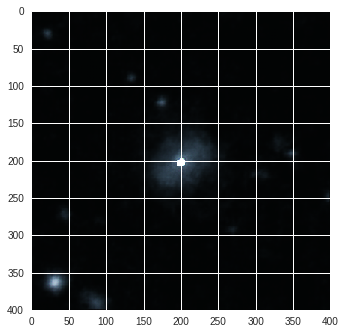

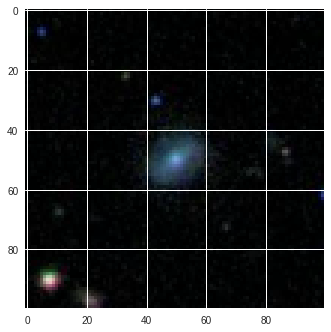

In [0]:
x_decoded = gen.predict(x_train)
from PIL import Image
print(x_decoded.shape)
test = x_decoded[99, : , :, :]
test =(test*255).astype(np.uint8)
plt.imshow(test,  interpolation='none', cmap='gray')
plt.show()
Image.fromarray(test).save('decode2.png')
test1 = x_train[99, :, :, :]
test1 =(test1*255).astype(np.uint8)
plt.imshow(test1,  interpolation='none', cmap='gray')
plt.show()
Image.fromarray(test1).save('encode2.png')